#### Emma Johnson
#### CPTS 315
#### Project Code
## Wine Quality Predictor/ Classifier

### Formatting Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
white_data = pd.read_csv('winequality-white.csv')
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#Quality:
# 0-3 is poor, 4-6 average, 7-10 great
bins = [0,3,6,10]
quality_labels = [0,1,2]
white_data['quality_categorical'] = pd.cut(white_data['quality'], bins=bins, labels = quality_labels, include_lowest=True)
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
quality_raw =white_data['quality_categorical']
features_raw = white_data.drop(['quality', 'quality_categorical'], axis=1)


In [5]:
features_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [6]:
#want to split the data, can use sklearn to do this


#split features and income data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_raw, quality_raw, test_size = .3, random_state=0)




In [7]:
print("training set has %d samples." % x_train.shape[0])
print("testing set has %d samples." % x_test.shape[0])

training set has 3428 samples.
testing set has 1470 samples.


### Training

In [8]:
classif = DecisionTreeClassifier(max_depth=None, random_state=None)

In [9]:
sample_size = len(y_train)
results = {}
learner = classif.fit(x_train[:sample_size], y_train[:sample_size])

predictions_train = learner.predict(x_train)
predictions_test = learner.predict(x_test)

results['Testing Acc'] = accuracy_score(y_test, predictions_test)
results['Training Acc'] = accuracy_score(y_train, predictions_train)

print(results)


{'Testing Acc': 0.8129251700680272, 'Training Acc': 1.0}


Text(0.5,1,'White Wine Classifier Accuracy')

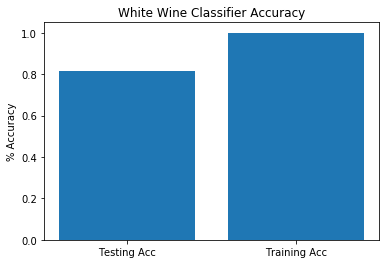

In [10]:
plt.bar(range(len(results)), list(results.values()), align='center')
plt.xticks(range(len(results)), list(results.keys()))
plt.ylabel('% Accuracy')
plt.title('White Wine Classifier Accuracy')

In [11]:
wine_data = [[8,.2,.16,1.8,.065,3,16,.9962,3.42,.92,10]] #we know this is average for white

print(learner.predict(wine_data))

[1]


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[0.05860019 0.08832961 0.05693688 0.06078962 0.06921513 0.08684164
 0.06857919 0.09958116 0.08810477 0.07698176 0.24604005]


<BarContainer object of 11 artists>

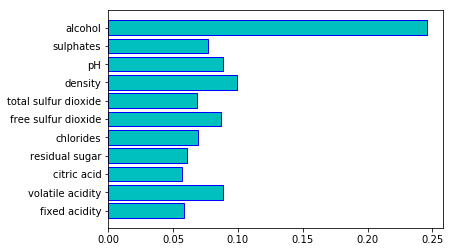

In [12]:
importances = classif.feature_importances_
    
print(x_train.columns)
print(importances)
plt.barh(x_train.columns, importances, color = 'c', edgecolor = 'b')

In [13]:
from sklearn import tree
tree.export_graphviz(classif, out_file='tree.dot')